In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

restaurants = pd.read_csv(r"/content/sample_data/restaurant.csv")
users = pd.read_csv(r"/content/sample_data/users.csv")
orders = pd.read_csv(r"/content/sample_data/orders (3).csv")
food = pd.read_csv(r"/content/sample_data/food.csv")
menu = pd.read_csv(r"/content/sample_data/menu.csv")


/tmp/ipython-input-2553226876.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  menu = pd.read_csv(r"/content/sample_data/menu.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
# Merge orders with restaurant
orders_rest = orders.merge(restaurants, left_on='r_id', right_on='id')

# Group by restaurant name and sum sales_amount
top10_restaurants = orders_rest.groupby('name')['sales_amount'].sum().sort_values(ascending=False).head(10)
print(top10_restaurants)

name
Krishna Food                             1283875
Mirch Masala                              999459
Jayhind Sweets                            970130
Red Chilly Chinese Food                   807301
The Wok Tales                             659380
Myriad-Ii Restaurant And Banquet          613532
Radhika'S Authentic South Indian Food     532491
The Sizzling swad                         515977
Poonam Cafe                               484380
Wooddy Jhone's Pizza                      420731
Name: sales_amount, dtype: int64


In [26]:
# Convert order_date to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Extract month-year
orders['order_month'] = orders['order_date'].dt.to_period('M')

# Group by month
monthly_trends = orders.groupby('order_month').size().reset_index(name='total_orders')
print(monthly_trends)

   order_month  total_orders
0      2017-10          4293
1      2017-11          5500
2      2017-12          4975
3      2018-01          5320
4      2018-02          5024
5      2018-03          5238
6      2018-04          5120
7      2018-05          5279
8      2018-06          5534
9      2018-07          5405
10     2018-08          5379
11     2018-09          4873
12     2018-10          5171
13     2018-11          4905
14     2018-12          4293
15     2019-01          4691
16     2019-02          4630
17     2019-03          4664
18     2019-04          4447
19     2019-05          4740
20     2019-06          4385
21     2019-07          4958
22     2019-08          4091
23     2019-09          4142
24     2019-10          4299
25     2019-11          3944
26     2019-12          3431
27     2020-01          4003
28     2020-02          4031
29     2020-03          3583
30     2020-04          3621
31     2020-05          3565
32     2020-06          2747


In [27]:
# Replace invalid characters and convert to numeric
restaurants['rating'] = pd.to_numeric(restaurants['rating'], errors='coerce')

# Replace invalid ratings with NaN
restaurants['rating'] = restaurants['rating'].fillna(0)

In [28]:
top20_cities = restaurants['city'].value_counts().head(20).index
city_stats = restaurants[restaurants['city'].isin(top20_cities)] \
             .groupby('city').agg(avg_rating=('rating','mean'), total_rating_count=('rating_count','sum')) \
             .sort_values('avg_rating', ascending=False)

print(city_stats)

                            avg_rating  \
city                                     
Agartala                      2.857576   
Adoni                         2.189189   
Adilabad                      2.100000   
Adityapur                     2.016573   
Vastrapur,Ahmedabad           1.718960   
Gandhinagar,Ahmedabad         1.649614   
Paldi & Ambawadi,Ahmedabad    1.417614   
Agra                          1.260000   
Bopal,Ahmedabad               1.157035   
Ghatlodia,Ahmedabad           1.148505   
Naranpura,Ahmedabad           1.146207   
GOTA,Ahmedabad                1.123457   
Abohar                        0.995161   
LalDarwaja,Ahmedabad          0.381818   

                                                           total_rating_count  
city                                                                           
Agartala                    Too Few Ratings1K+ ratings1K+ ratingsToo Few R...  
Adoni                       50+ ratings50+ ratings100+ ratings50+ ratings5...  
Adilaba

In [29]:
# Convert order_date to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Extract month-year
orders['order_month'] = orders['order_date'].dt.to_period('M')

# Group by month
monthly_trends = orders.groupby('order_month').size().reset_index(name='total_orders')
print(monthly_trends)

   order_month  total_orders
0      2017-10          4293
1      2017-11          5500
2      2017-12          4975
3      2018-01          5320
4      2018-02          5024
5      2018-03          5238
6      2018-04          5120
7      2018-05          5279
8      2018-06          5534
9      2018-07          5405
10     2018-08          5379
11     2018-09          4873
12     2018-10          5171
13     2018-11          4905
14     2018-12          4293
15     2019-01          4691
16     2019-02          4630
17     2019-03          4664
18     2019-04          4447
19     2019-05          4740
20     2019-06          4385
21     2019-07          4958
22     2019-08          4091
23     2019-09          4142
24     2019-10          4299
25     2019-11          3944
26     2019-12          3431
27     2020-01          4003
28     2020-02          4031
29     2020-03          3583
30     2020-04          3621
31     2020-05          3565
32     2020-06          2747


In [30]:
top20_city_restaurants = restaurants['city'].value_counts().head(20)
print(top20_city_restaurants)

city
Vastrapur,Ahmedabad           596
Agra                          455
Bopal,Ahmedabad               398
Gandhinagar,Ahmedabad         389
Adityapur                     356
Ghatlodia,Ahmedabad           301
GOTA,Ahmedabad                243
Paldi & Ambawadi,Ahmedabad    176
Agartala                      165
Naranpura,Ahmedabad           145
Abohar                         62
Adoni                          37
Adilabad                       25
LalDarwaja,Ahmedabad           11
Name: count, dtype: int64


In [31]:
# Check columns in users
print(users.columns)

# Since gender is missing, we can’t compute this
print("Cannot compute spending by gender: 'gender' column missing.")

Index(['Unnamed: 0', 'user_id', 'name', 'email', 'password', 'Age', 'Gender',
       'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size'],
      dtype='object')
Cannot compute spending by gender: 'gender' column missing.


In [22]:
orders_users = orders.merge(users, left_on='user_id', right_on='user_id')
top15_users = orders_users.groupby(['user_id','name'])['sales_amount'].sum().sort_values(ascending=False).head(15)
print(top15_users)

user_id  name            
70591    Amanda Ballard      1514634
16975    Gina Carpenter      1496625
55915    Jonathan Vasquez    1478987
62645    Lisa Aguirre        1478074
94568    Richard Edwards     1338264
1159     Elizabeth Martin    1320653
23667    Brian White         1284412
15402    Cassandra Benson    1284093
83766    Elizabeth Ryan      1235440
64054    Jeffrey Smith       1228148
79021    Billy Wilson        1225324
73892    Melissa Brown       1161643
46986    Joshua Lyons        1099403
21969    Cesar Brown         1089833
10182    Krystal Gilbert     1075047
Name: sales_amount, dtype: int64


In [23]:
# Count unique dishes per restaurant
diverse_menu = menu.groupby('r_id')['f_id'].nunique().reset_index(name='unique_dishes')

# Add restaurant name
diverse_menu = diverse_menu.merge(restaurants[['id','name','cuisine']], left_on='r_id', right_on='id')

# Count unique cuisines per restaurant (usually 1)
diverse_menu['unique_cuisines'] = 1  # replace with actual logic if multiple cuisines exist

# Sort by unique_dishes
top_diverse_rest = diverse_menu.sort_values(['unique_dishes','unique_cuisines'], ascending=False).head(10)
print(top_diverse_rest[['name','unique_dishes','unique_cuisines']])

                                 name  unique_dishes  unique_cuisines
1245                       Hungry Kya            479                1
1411                           Parosa            446                1
1662                           Honest            400                1
2708            PUJA SWEETS BHALUBASA            400                1
157                          Charotar            397                1
478   Palatine Restaurant And Banquet            397                1
425                        Jiva Hotel            395                1
604                  Daya Hari Mithai            395                1
405                        Chopsticks            392                1
1334     Chulah Matka Biryani Kitchen            388                1


/tmp/ipython-input-1320159715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_restaurants.values, y=top10_restaurants.index, palette="viridis")


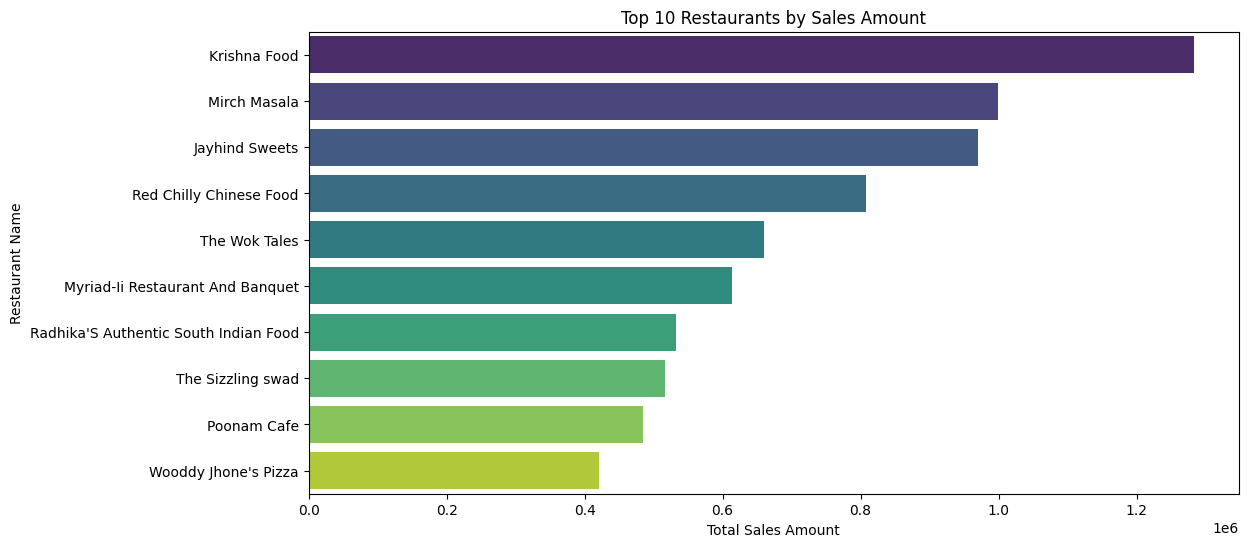

In [32]:
orders_rest = orders.merge(restaurants, left_on='r_id', right_on='id')
top10_restaurants = orders_rest.groupby('name')['sales_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_restaurants.values, y=top10_restaurants.index, palette="viridis")
plt.xlabel("Total Sales Amount")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Restaurants by Sales Amount")
plt.show()

/tmp/ipython-input-869547540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_stats.index, y=city_stats['avg_rating'], palette="coolwarm")


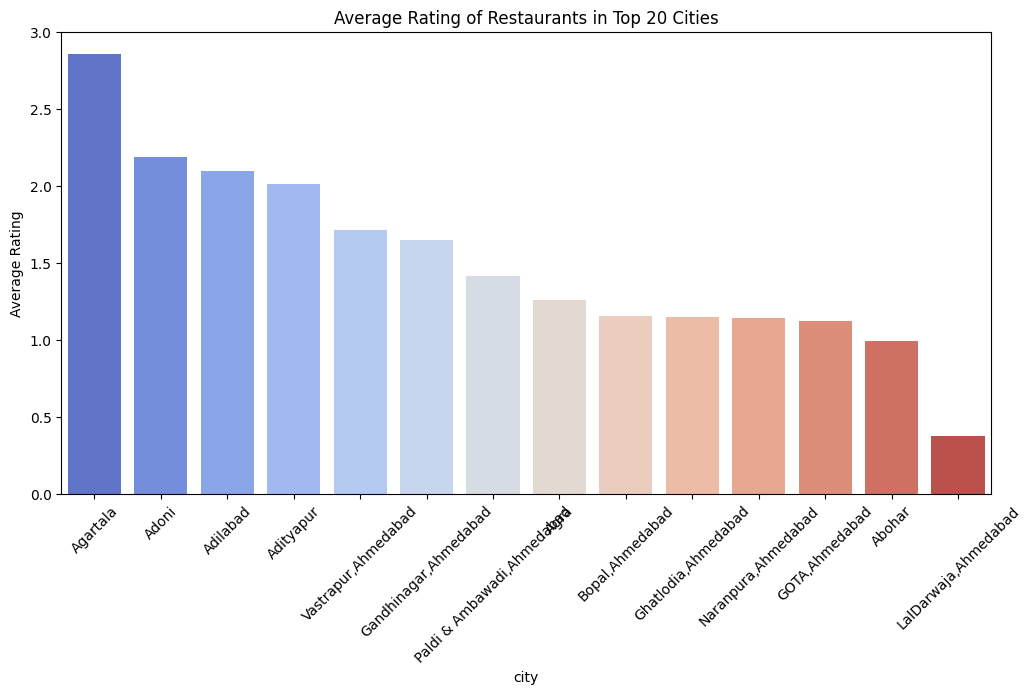

In [33]:
top20_cities = restaurants['city'].value_counts().head(20).index
city_stats = restaurants[restaurants['city'].isin(top20_cities)] \
             .groupby('city').agg(avg_rating=('rating','mean')).sort_values('avg_rating', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=city_stats.index, y=city_stats['avg_rating'], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.title("Average Rating of Restaurants in Top 20 Cities")
plt.show()

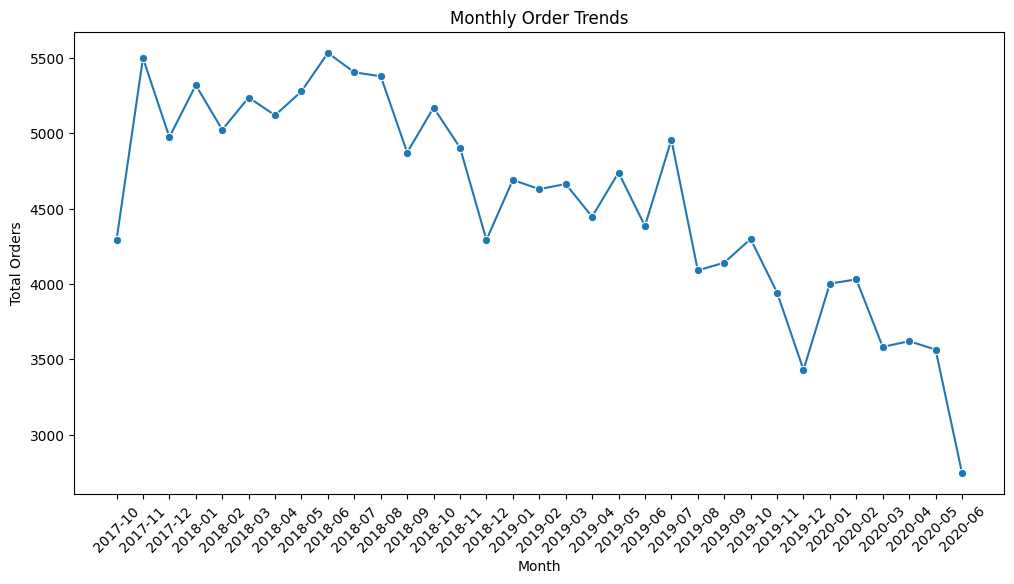

In [34]:
orders['order_month'] = orders['order_date'].dt.to_period('M')
monthly_trends = orders.groupby('order_month').size().reset_index(name='total_orders')

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_trends['order_month'].astype(str), y=monthly_trends['total_orders'], marker='o')
plt.xticks(rotation=45)
plt.ylabel("Total Orders")
plt.xlabel("Month")
plt.title("Monthly Order Trends")
plt.show()

In [40]:
print(orders.columns)
print(menu.columns)
print(food.columns)

Index(['Unnamed: 0', 'order_date', 'sales_qty', 'sales_amount', 'currency',
       'user_id', 'r_id', 'order_month', 'day_of_week'],
      dtype='object')
Index(['Unnamed: 0', 'menu_id', 'r_id', 'f_id', 'cuisine', 'price'], dtype='object')
Index(['Unnamed: 0', 'f_id', 'item', 'veg_or_non_veg'], dtype='object')


/tmp/ipython-input-537151634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peak_days.index, y=peak_days.values, palette="Spectral")


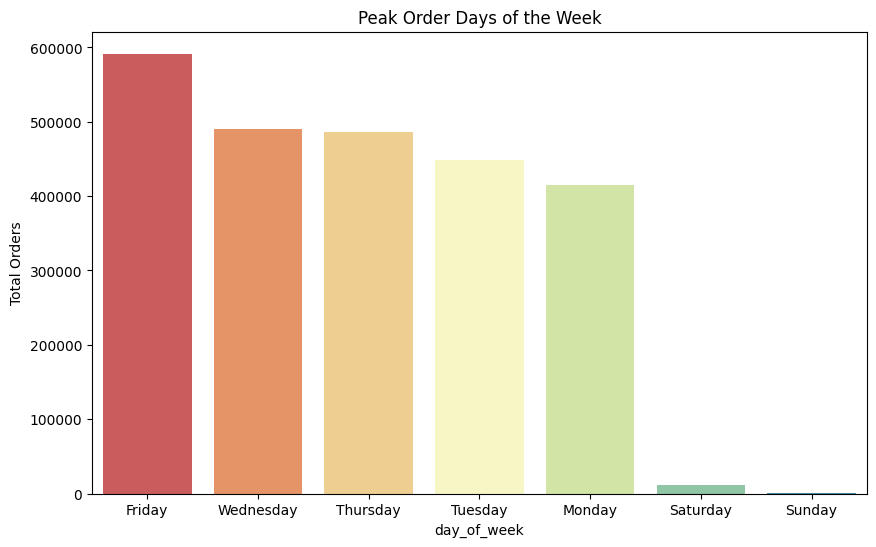

In [37]:
orders['day_of_week'] = orders['order_date'].dt.day_name()
peak_days = orders.groupby('day_of_week')['sales_qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=peak_days.index, y=peak_days.values, palette="Spectral")
plt.ylabel("Total Orders")
plt.title("Peak Order Days of the Week")
plt.show()

In [42]:
print("Orders columns:", orders.columns)
print("Menu columns:", menu.columns)
print("Food columns:", food.columns)

Orders columns: Index(['Unnamed: 0', 'order_date', 'sales_qty', 'sales_amount', 'currency',
       'user_id', 'r_id', 'order_month', 'day_of_week'],
      dtype='object')
Menu columns: Index(['Unnamed: 0', 'menu_id', 'r_id', 'f_id', 'cuisine', 'price'], dtype='object')
Food columns: Index(['Unnamed: 0', 'f_id', 'item', 'veg_or_non_veg'], dtype='object')


In [45]:
users.columns = users.columns.str.strip()
orders.columns = orders.columns.str.strip()

In [46]:
print(users.columns)

Index(['Unnamed: 0', 'user_id', 'name', 'email', 'password', 'Age', 'Gender',
       'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size'],
      dtype='object')


/tmp/ipython-input-537151634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peak_days.index, y=peak_days.values, palette="Spectral")


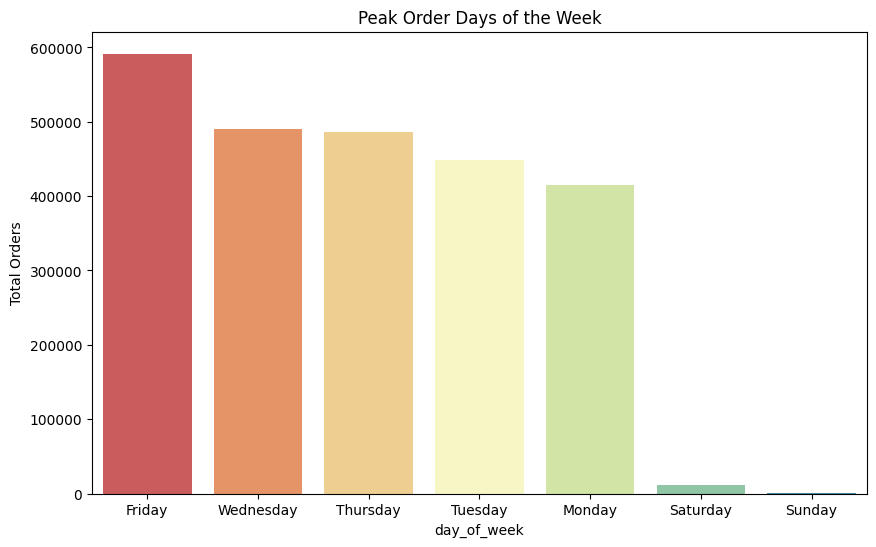

In [52]:
orders['day_of_week'] = orders['order_date'].dt.day_name()
peak_days = orders.groupby('day_of_week')['sales_qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=peak_days.index, y=peak_days.values, palette="Spectral")
plt.ylabel("Total Orders")
plt.title("Peak Order Days of the Week")
plt.show()

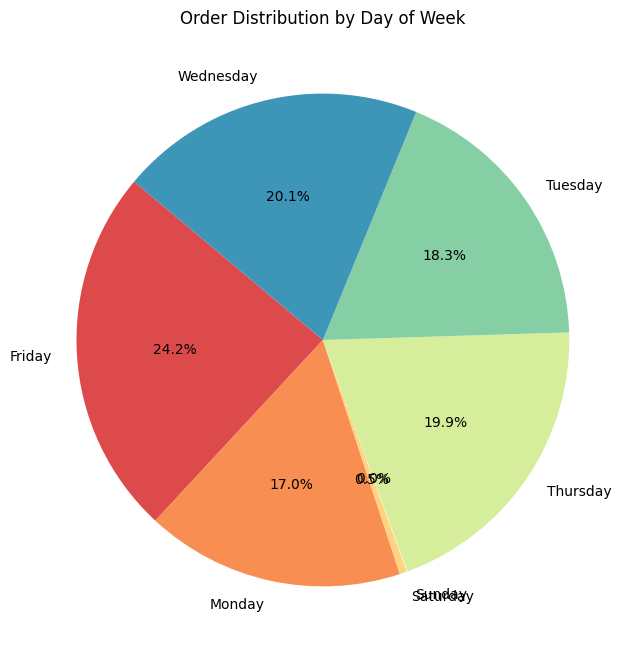

In [56]:
orders['day_of_week'] = orders['order_date'].dt.day_name()
peak_days = orders.groupby('day_of_week')['sales_qty'].sum()

plt.figure(figsize=(8,8))
plt.pie(peak_days, labels=peak_days.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Spectral", len(peak_days)))
plt.title("Order Distribution by Day of Week")
plt.show()